In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [4]:
df = pd.read_csv('/content/^HSI.csv')

In [5]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-29,27101.539063,27333.300781,27101.539063,27160.630859,27160.630859,2203836100
1,2020-01-30,27030.609375,27134.550781,26330.050781,26449.130859,26449.130859,2223567800
2,2020-01-31,26757.609375,26818.839844,26295.490234,26312.630859,26312.630859,1874255200
3,2020-02-03,26189.609375,26512.580078,26145.589844,26356.980469,26356.980469,2421482700
4,2020-02-04,26491.660156,26730.259766,26491.660156,26675.980469,26675.980469,2500238100


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
710,2022-12-09,19484.230469,19926.480469,19404.500000,19900.869141,19900.869141,4023277500
711,2022-12-12,19594.519531,19718.080078,19366.220703,19463.630859,19463.630859,3115198500
712,2022-12-13,19458.019531,19707.750000,19382.300781,19596.199219,19596.199219,2584117300
713,2022-12-14,19775.330078,19859.750000,19528.710938,19673.449219,19673.449219,2758656100
714,2022-12-15,19612.669922,19675.679688,19233.859375,19368.589844,19368.589844,2243394000


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,715.000000,715.000000,715.000000,715.000000,715.000000,7.150000e+02
mean,24233.429110,24406.109954,24006.583327,24212.414714,24212.414714,2.282605e+09
std,3455.793140,3439.905898,3450.724267,3443.583282,3443.583282,8.445311e+08
min,14830.690430,15113.150391,14597.309570,14687.019531,14687.019531,0.000000e+00
25%,21774.464844,21940.674804,21563.135742,21819.665039,21819.665039,1.744918e+09
50%,24614.140625,24762.609375,24346.750000,24589.650391,24589.650391,2.078973e+09
75%,26491.054688,26656.500001,26318.424804,26455.914063,26455.914063,2.567486e+09
max,31183.359375,31183.359375,30570.550781,31084.939453,31084.939453,6.012760e+09


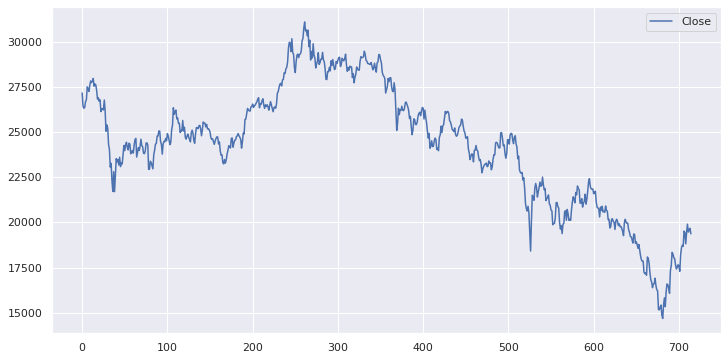

In [8]:
df[['Close']].plot(figsize=(12,6));


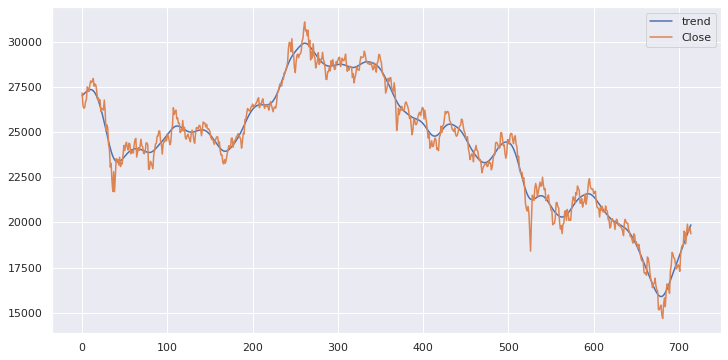

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [10]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.2224337655137374,
 0.6638715972094792,
 0,
 714,
 {'1%': -3.4395418285955563,
  '5%': -2.865596454500293,
  '10%': -2.5689301318958955},
 10188.19058016444)

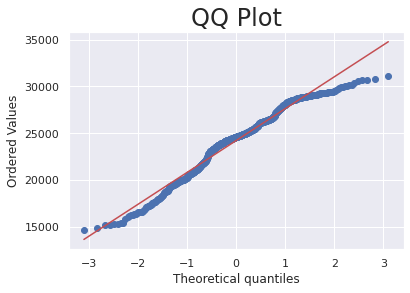

In [11]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [12]:
df['returns'] = df.Close.pct_change(1)*100

In [13]:
df['sq_returns'] = df.returns.mul(df.returns)


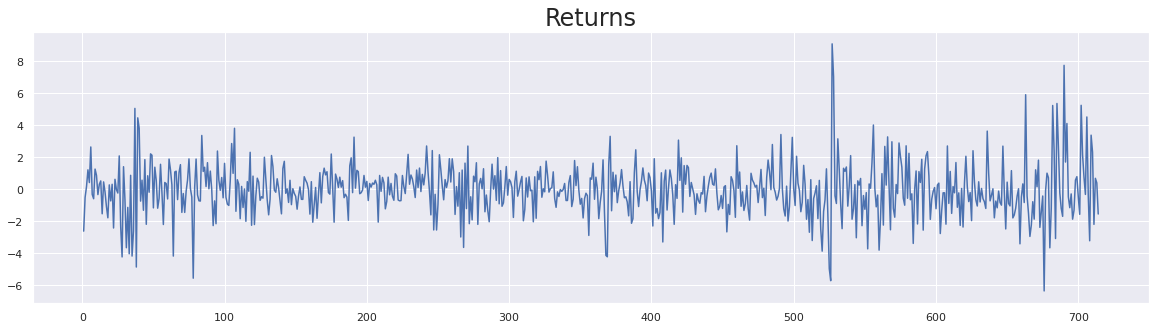

In [14]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


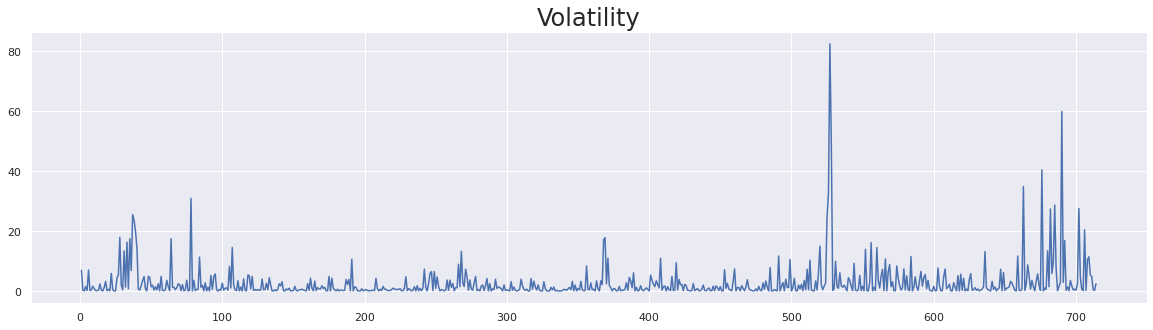

In [15]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

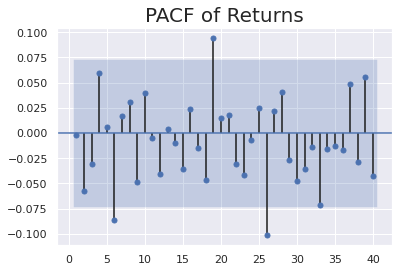

In [16]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

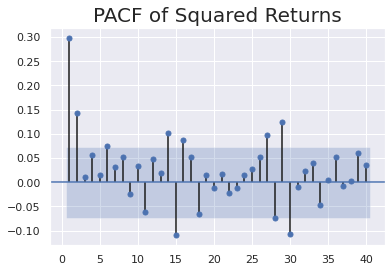

In [17]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [18]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 13.4 MB/s eta 0:00:00


In [19]:
from arch import arch_model


In [20]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [21]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1579.8900486702903
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1511.402438605755
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1368.6215870801093
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1346.1751317950411
Iteration:      5,   Func. Count:     25,   Neg. LLF: 1346.1751317950486
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1346.1751317950411
            Iterations: 5
            Function evaluations: 25
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1346.18
Distribution:                  Normal   AIC:                           2698.35
Method:            Maximum Likelihood   BIC:                           2712.06
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:27   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0325  6.070e-02     -0.536      0.592 [ -0.152,8.642e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.1790      0.186     11.689  1.449e-31   [  1.814,  2.544]
alpha[1]       0.1726  5.919e-02      2.916  3.542e-03 [5.661e-02,  0.289]
==========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 1337.6394791930038
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1337.6207170015075
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1337.62
Distribution:                  Normal   AIC:                           2683.24
Method:            Maximum Likelihood   BIC:                           2701.52
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:27   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0181  6.017e-02     -0.300      0.764 [ -0.136,9.985e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.9127      0.199      9.624  6.350e-22    [  1.523,  2.302]
alpha[1]       0.0969  5.646e-02      1.716  8.620e-02 [-1.378e-02,  0.208]
alpha[2]       0.1715  6.990e-02      2.454  1.414e-02  [3.451e-02,  0.309]
===========================================================================

Covariance estimator: robust
"""

In [23]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1337.3504611742997
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1334.3917930819425
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1334.3917930818964
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1334.39
Distribution:                  Normal   AIC:                           2678.78
Method:            Maximum Likelihood   BIC:                           2701.64
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:27   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0149  5.909e-02     -0.252      0.801 [ -0.131,  0.101]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7408      0.216      8.048  8.382e-16    [  1.317,  2.165]
alpha[1]       0.0767  6.247e-02      1.228      0.220 [-4.574e-02,  0.199]
alpha[2]       0.1738  6.848e-02      2.538  1.116e-02  [3.957e-02,  0.308]
alpha[3]       0.0872  5.719e-02      1.524      0.127 [-2.493e-02,  0.199]
===========================================================================

Covariance estimator: robust
"""

In [24]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     87,   Neg. LLF: 2126.496616039072
Iteration:     10,   Func. Count:    175,   Neg. LLF: 1357.6827238008939
Iteration:     15,   Func. Count:    260,   Neg. LLF: 1324.9596527770952
Iteration:     20,   Func. Count:    345,   Neg. LLF: 1306.5049948797314
Iteration:     25,   Func. Count:    427,   Neg. LLF: 1306.4878423552022
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1306.4878423552022
            Iterations: 26
            Function evaluations: 442
            Gradient evaluations: 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1306.49
Distribution:                  Normal   AIC:                           2642.98
Method:            Maximum Likelihood   BIC:                           2711.54
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:27   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0175  7.215e-02     -0.242      0.809 [ -0.159,  0.124]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.7377      0.242      3.046  2.321e-03      [  0.263,  1.212]
alpha[1]       0.0348  7.870e-02      0.442      0.658      [ -0.119,  0.189]
alpha[2]       0.1548  8.136e-02      1.902  5.712e-02   [-4.681e-03,  0.314]
alpha[3]       0.1274      0.122      1.045      0.296      [ -0.112,  0.366]
alpha[4]       0.1292  7.957e-02      1.623      0.105   [-2.678e-02,  0.285]
alpha[5]       0.0244  6.421e-02      0.380      0.704      [ -0.101,  0.150]
alpha[6]       0.1055  7.427e-02      1.421      0.155   [-4.005e-02,  0.251]
alpha[7]   2.1330e-03  6.033e-02  3.536e-02      0.972      [ -0.116,  0.120]
alpha[8]       0.0352      0.109      0.322      0.748      [ -0.179,  0.249]
alpha[9]   2.4146e-11      0.237  1.018e-10      1.000      [ -0.465,  0.465]
alpha[10]      0.0550  8.996e-02      0.611      0.541      [ -0.121,  0.231]
alpha[11]  1.4630e-13  3.793e-02  3.857e-12      1.000 [-7.433e-02,7.433e-02]
alpha[12]      0.0512  4.859e-02      1.054      0.292   [-4.403e-02,  0.146]
alpha[13]      0.0385  5.186e-02      0.742      0.458   [-6.318e-02,  0.140]
=============================================================================

Covariance estimator: robust
"""

In [25]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [26]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1358.3667662961775
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1311.305930889208
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1311.31
Distribution:                  Normal   AIC:                           2630.61
Method:            Maximum Likelihood   BIC:                           2648.90
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:28   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0109  5.252e-02     -0.207      0.836 [ -0.114,9.208e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0623  3.869e-02      1.610      0.107 [-1.356e-02,  0.138]
alpha[1]       0.0907  2.601e-02      3.489  4.855e-04  [3.976e-02,  0.142]
beta[1]        0.8892  3.354e-02     26.514 6.677e-155    [  0.823,  0.955]
===========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 1311.4242473824554
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1311.30593088046
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1311.30593088046
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1311.31
Distribution:                  Normal   AIC:                           2632.61
Method:            Maximum Likelihood   BIC:                           2655.47
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:28   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0109  5.271e-02     -0.206      0.837 [ -0.114,9.246e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0623  3.835e-02      1.624      0.104 [-1.289e-02,  0.137]
alpha[1]       0.0907  2.903e-02      3.125  1.776e-03  [3.384e-02,  0.148]
beta[1]        0.8892      0.418      2.126  3.352e-02  [6.938e-02,  1.709]
beta[2]        0.0000      0.400      0.000      1.000    [ -0.783,  0.783]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     48,   Neg. LLF: 1608.976233675272
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1311.3186895008616
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1311.3059308837794
            Iterations: 14
            Function evaluations: 111
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1311.31
Distribution:                  Normal   AIC:                           2634.61
Method:            Maximum Likelihood   BIC:                           2662.04
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:28   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0109  5.266e-02     -0.206      0.837 [ -0.114,9.235e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0623  3.857e-02      1.615      0.106 [-1.332e-02,  0.138]
alpha[1]       0.0907  3.184e-02      2.850  4.373e-03  [2.834e-02,  0.153]
beta[1]        0.8892      0.363      2.451  1.424e-02    [  0.178,  1.600]
beta[2]        0.0000      0.354      0.000      1.000    [ -0.693,  0.693]
beta[3]    4.8534e-17      0.279  1.738e-16      1.000    [ -0.547,  0.547]
===========================================================================

Covariance estimator: robust
"""

In [29]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 1311.3861784761789
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1310.4049181471032
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1310.4049181474156
            Iterations: 10
            Function evaluations: 75
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1310.40
Distribution:                  Normal   AIC:                           2630.81
Method:            Maximum Likelihood   BIC:                           2653.66
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:28   Df Model:                            1
                                 Mean Model                                
===========================================================================
                  coef    std err          t      P>|t|    95.0% Conf. Int.
---------------------------------------------------------------------------
mu         -7.2337e-03  5.265e-02     -0.137      0.891 [ -0.110,9.596e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0889  7.267e-02      1.224      0.221 [-5.349e-02,  0.231]
alpha[1]       0.0409  5.756e-02      0.710      0.478 [-7.193e-02,  0.154]
alpha[2]       0.0856      0.101      0.846      0.398    [ -0.113,  0.284]
beta[1]        0.8464  7.746e-02     10.927  8.551e-28    [  0.695,  0.998]
===========================================================================

Covariance estimator: robust
"""

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     48,   Neg. LLF: 1311.4013158252392
Iteration:     10,   Func. Count:     85,   Neg. LLF: 1310.4049301615194
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1310.4049177194884
            Iterations: 13
            Function evaluations: 105
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1310.40
Distribution:                  Normal   AIC:                           2632.81
Method:            Maximum Likelihood   BIC:                           2660.24
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:28   Df Model:                            1
                                 Mean Model                                
===========================================================================
                  coef    std err          t      P>|t|    95.0% Conf. Int.
---------------------------------------------------------------------------
mu         -7.2458e-03  5.238e-02     -0.138      0.890 [ -0.110,9.543e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0890      0.113      0.790      0.430    [ -0.132,  0.310]
alpha[1]       0.0409  5.693e-02      0.718      0.473 [-7.071e-02,  0.152]
alpha[2]       0.0856  9.327e-02      0.918      0.359 [-9.719e-02,  0.268]
alpha[3]       0.0000      0.116      0.000      1.000    [ -0.228,  0.228]
beta[1]        0.8464      0.137      6.158  7.377e-10    [  0.577,  1.116]
===========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [32]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 4185.016505019544
Iteration:     10,   Func. Count:     77,   Neg. LLF: 1301.9018209015294
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1301.901820901834
            Iterations: 10
            Function evaluations: 77
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1301.90
Distribution:                  Normal   AIC:                           2613.80
Method:            Maximum Likelihood   BIC:                           2636.66
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:28   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0643  5.356e-02     -1.201      0.230 [ -0.169,4.066e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0355  1.569e-02      2.262  2.372e-02 [4.731e-03,6.622e-02]
alpha[1]       0.1588  3.758e-02      4.226  2.377e-05   [8.517e-02,  0.232]
gamma[1]      -0.0969  2.711e-02     -3.575  3.506e-04  [ -0.150,-4.378e-02]
beta[1]        0.9651  1.696e-02     56.903      0.000     [  0.932,  0.998]
============================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1300.88
Distribution:                  Normal   AIC:                           2611.76
Method:            Maximum Likelihood   BIC:                           2634.61
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:28   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0668  5.343e-02     -1.249      0.212 [ -0.171,3.797e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0643  3.119e-02      2.060  3.937e-02    [3.129e-03,  0.125]
alpha[1]       0.0181  1.540e-02      1.177      0.239 [-1.206e-02,4.829e-02]
gamma[1]       0.1237  3.894e-02      3.177  1.487e-03    [4.740e-02,  0.200]
beta[1]        0.8993  2.661e-02     33.790 2.762e-250      [  0.847,  0.951]
=============================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [36]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1304.9655330990759
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1301.0060833086982
Iteration:     15,   Func. Count:    105,   Neg. LLF: 1300.9243196262914
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1300.924293803986
            Iterations: 18
            Function evaluations: 128
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1300.92
Distribution:                  Normal   AIC:                           2611.85
Method:            Maximum Likelihood   BIC:                           2634.70
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:28   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu            -0.0664  9.780e-04    -67.871      0.000 [-6.829e-02,-6.446e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0518  2.358e-02      2.198  2.792e-02  [5.623e-03,9.805e-02]
alpha[1]       0.0221  1.865e-02      1.184      0.237 [-1.448e-02,5.863e-02]
gamma[1]       0.1128  3.048e-02      3.700  2.152e-04    [5.305e-02,  0.173]
beta[1]        0.9081  2.514e-02     36.122 1.040e-285      [  0.859,  0.957]
=============================================================================

Covariance estimator: robust
"""

In [37]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [38]:
from arch.univariate import FIGARCH

In [39]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1309.4202607619886
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1309.1310406706152
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1309.1310406706152
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1309.13
Distribution:                  Normal   AIC:                           2628.26
Method:            Maximum Likelihood   BIC:                           2651.12
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:29   Df Model:                            1
                                 Mean Model                                
===========================================================================
                  coef    std err          t      P>|t|    95.0% Conf. Int.
---------------------------------------------------------------------------
mu         -4.8093e-03  5.205e-02 -9.240e-02      0.926 [ -0.107,9.720e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1541  9.456e-02      1.630      0.103 [-3.123e-02,  0.339]
phi        4.0797e-18      0.177  2.307e-17      1.000    [ -0.347,  0.347]
d              0.4480      0.149      3.009  2.620e-03    [  0.156,  0.740]
beta           0.4003      0.232      1.726  8.426e-02 [-5.415e-02,  0.855]
===========================================================================

Covariance estimator: robust
"""

In [40]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [41]:
from arch.univariate import HARCH

In [42]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1438.0479172230084
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1371.5931783928452
Iteration:     15,   Func. Count:     78,   Neg. LLF: 1346.1752076531861
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1346.1751317497412
            Iterations: 18
            Function evaluations: 89
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1346.18
Distribution:                  Normal   AIC:                           2698.35
Method:            Maximum Likelihood   BIC:                           2712.06
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:29   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0326  6.070e-02     -0.536      0.592 [ -0.152,8.642e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.1790      0.186     11.689  1.447e-31   [  1.814,  2.544]
alpha[1]       0.1726  5.920e-02      2.916  3.541e-03 [5.661e-02,  0.289]
==========================================================================

Covariance estimator: robust
"""

In [43]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [44]:
from arch.univariate import APARCH


In [45]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1606.991775414785
Iteration:     10,   Func. Count:     85,   Neg. LLF: 1300.8285914216956
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1300.8285914216956
            Iterations: 11
            Function evaluations: 91
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1300.83
Distribution:                  Normal   AIC:                           2613.66
Method:            Maximum Likelihood   BIC:                           2641.08
                                        No. Observations:                  714
Date:                Thu, Jan 26 2023   Df Residuals:                      713
Time:                        02:16:29   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0662  5.438e-02     -1.217      0.224 [ -0.173,4.039e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0585  5.603e-02      1.043      0.297 [-5.135e-02,  0.168]
alpha[1]       0.0728  6.903e-02      1.054      0.292 [-6.254e-02,  0.208]
gamma[1]       0.5580      1.043      0.535      0.593    [ -1.487,  2.603]
beta[1]        0.9026  3.891e-02     23.198 4.738e-119    [  0.826,  0.979]
delta          1.5961      4.055      0.394      0.694    [ -6.351,  9.543]
===========================================================================

Covariance estimator: robust
"""

In [46]:
from scipy import stats


In [47]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=28.65346770007947, pvalue=5.997614463959522e-07)

In [48]:
jarque_bera_test.statistic

28.65346770007947

In [49]:
jarque_bera_test.pvalue

5.997614463959522e-07

jarquer-bera para los retornos

In [50]:
returns = df.returns[1:]
returns

1     -2.619600
2     -0.516085
3      0.168549
4      1.210306
5      0.415204
         ...   
710    2.316881
711   -2.197081
712    0.681108
713    0.394209
714   -1.549598
Name: returns, Length: 714, dtype: float64

In [51]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=332.93187056551847, pvalue=0.0)

In [52]:
jarque_bera_test.statistic

332.93187056551847

In [53]:
jarque_bera_test.pvalue

0.0

curtosis

In [54]:
returns.kurt()

3.26570109103632

coef. asimetria

In [55]:
returns.skew()

0.4278339274794333

In [56]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -26.854
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.880
P-value                         0.004
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [58]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -11.651
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [59]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.068
P-value                         0.765
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [61]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        715 non-null    object 
 1   Open        715 non-null    float64
 2   High        715 non-null    float64
 3   Low         715 non-null    float64
 4   Close       715 non-null    float64
 5   Adj Close   715 non-null    float64
 6   Volume      715 non-null    int64  
 7   trend       715 non-null    float64
 8   returns     714 non-null    float64
 9   sq_returns  714 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 56.0+ KB


In [63]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [64]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [65]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [66]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [67]:
data = pd.read_csv("/content/^HSI.csv")

In [68]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-29,27101.539063,27333.300781,27101.539063,27160.630859,27160.630859,2203836100
1,2020-01-30,27030.609375,27134.550781,26330.050781,26449.130859,26449.130859,2223567800
2,2020-01-31,26757.609375,26818.839844,26295.490234,26312.630859,26312.630859,1874255200
3,2020-02-03,26189.609375,26512.580078,26145.589844,26356.980469,26356.980469,2421482700
4,2020-02-04,26491.660156,26730.259766,26491.660156,26675.980469,26675.980469,2500238100
...,...,...,...,...,...,...,...
710,2022-12-09,19484.230469,19926.480469,19404.500000,19900.869141,19900.869141,4023277500
711,2022-12-12,19594.519531,19718.080078,19366.220703,19463.630859,19463.630859,3115198500
712,2022-12-13,19458.019531,19707.750000,19382.300781,19596.199219,19596.199219,2584117300
713,2022-12-14,19775.330078,19859.750000,19528.710938,19673.449219,19673.449219,2758656100


In [69]:
data = data[["Date","Close","Volume"]]


In [70]:
data

,Date,Close,Volume
0,2020-01-29,27160.630859,2203836100
1,2020-01-30,26449.130859,2223567800
2,2020-01-31,26312.630859,1874255200
3,2020-02-03,26356.980469,2421482700
4,2020-02-04,26675.980469,2500238100
...,...,...,...
710,2022-12-09,19900.869141,4023277500
711,2022-12-12,19463.630859,3115198500
712,2022-12-13,19596.199219,2584117300
713,2022-12-14,19673.449219,2758656100


In [71]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-29,27160.630859,2203836100,26449.130859
1,2020-01-30,26449.130859,2223567800,26312.630859
2,2020-01-31,26312.630859,1874255200,26356.980469
3,2020-02-03,26356.980469,2421482700,26675.980469
4,2020-02-04,26675.980469,2500238100,26786.740234
...,...,...,...,...
710,2022-12-09,19900.869141,4023277500,19463.630859
711,2022-12-12,19463.630859,3115198500,19596.199219
712,2022-12-13,19596.199219,2584117300,19673.449219
713,2022-12-14,19673.449219,2758656100,19368.589844


In [72]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-29,27160.630859,2203836100,26449.130859
1,2020-01-30,26449.130859,2223567800,26312.630859
2,2020-01-31,26312.630859,1874255200,26356.980469
3,2020-02-03,26356.980469,2421482700,26675.980469
4,2020-02-04,26675.980469,2500238100,26786.740234
...,...,...,...,...
709,2022-12-08,19450.230469,2856166600,19900.869141
710,2022-12-09,19900.869141,4023277500,19463.630859
711,2022-12-12,19463.630859,3115198500,19596.199219
712,2022-12-13,19596.199219,2584117300,19673.449219


In [73]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [74]:
price_volume_target_scaled_df

array([[0.76068254, 0.36652653, 0.71729289],
       [0.71729289, 0.36980817, 0.70896866],
       [0.70896866, 0.31171295, 0.71167325],
       ...,
       [0.29129373, 0.51809792, 0.2993782 ],
       [0.2993782 , 0.42977223, 0.30408916],
       [0.30408916, 0.45880029, 0.28549782]])

In [75]:
price_volume_target_scaled_df.shape

(714, 3)

In [76]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [77]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((714, 2), (714, 1))

In [78]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [79]:
X_train.shape, y_train.shape

((464, 2), (464, 1))

In [80]:
X_test.shape, y_test.shape

((250, 2), (250, 1))

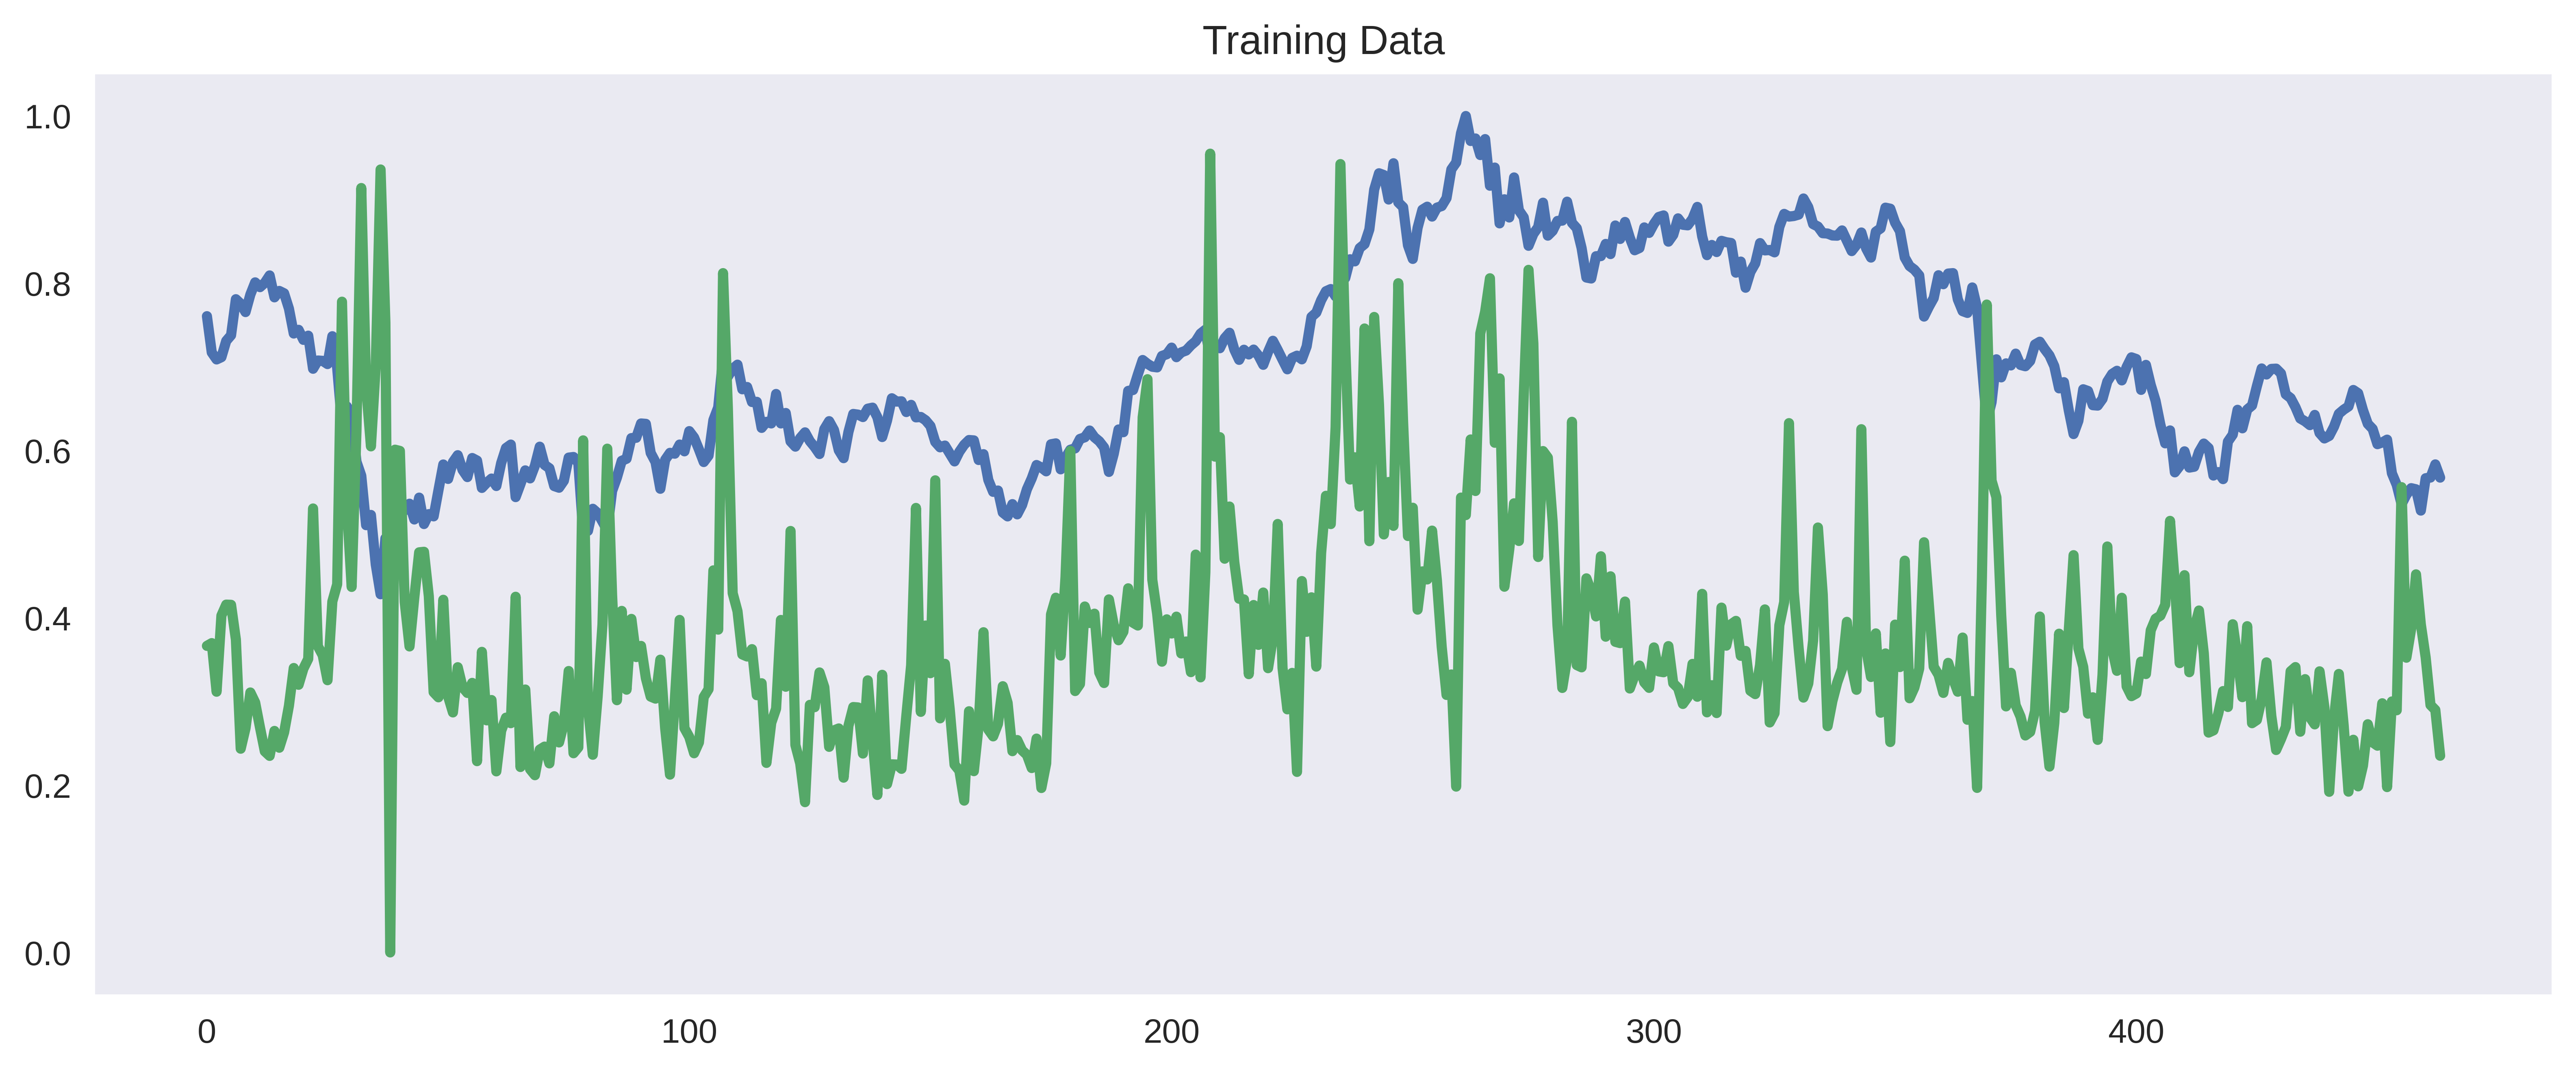

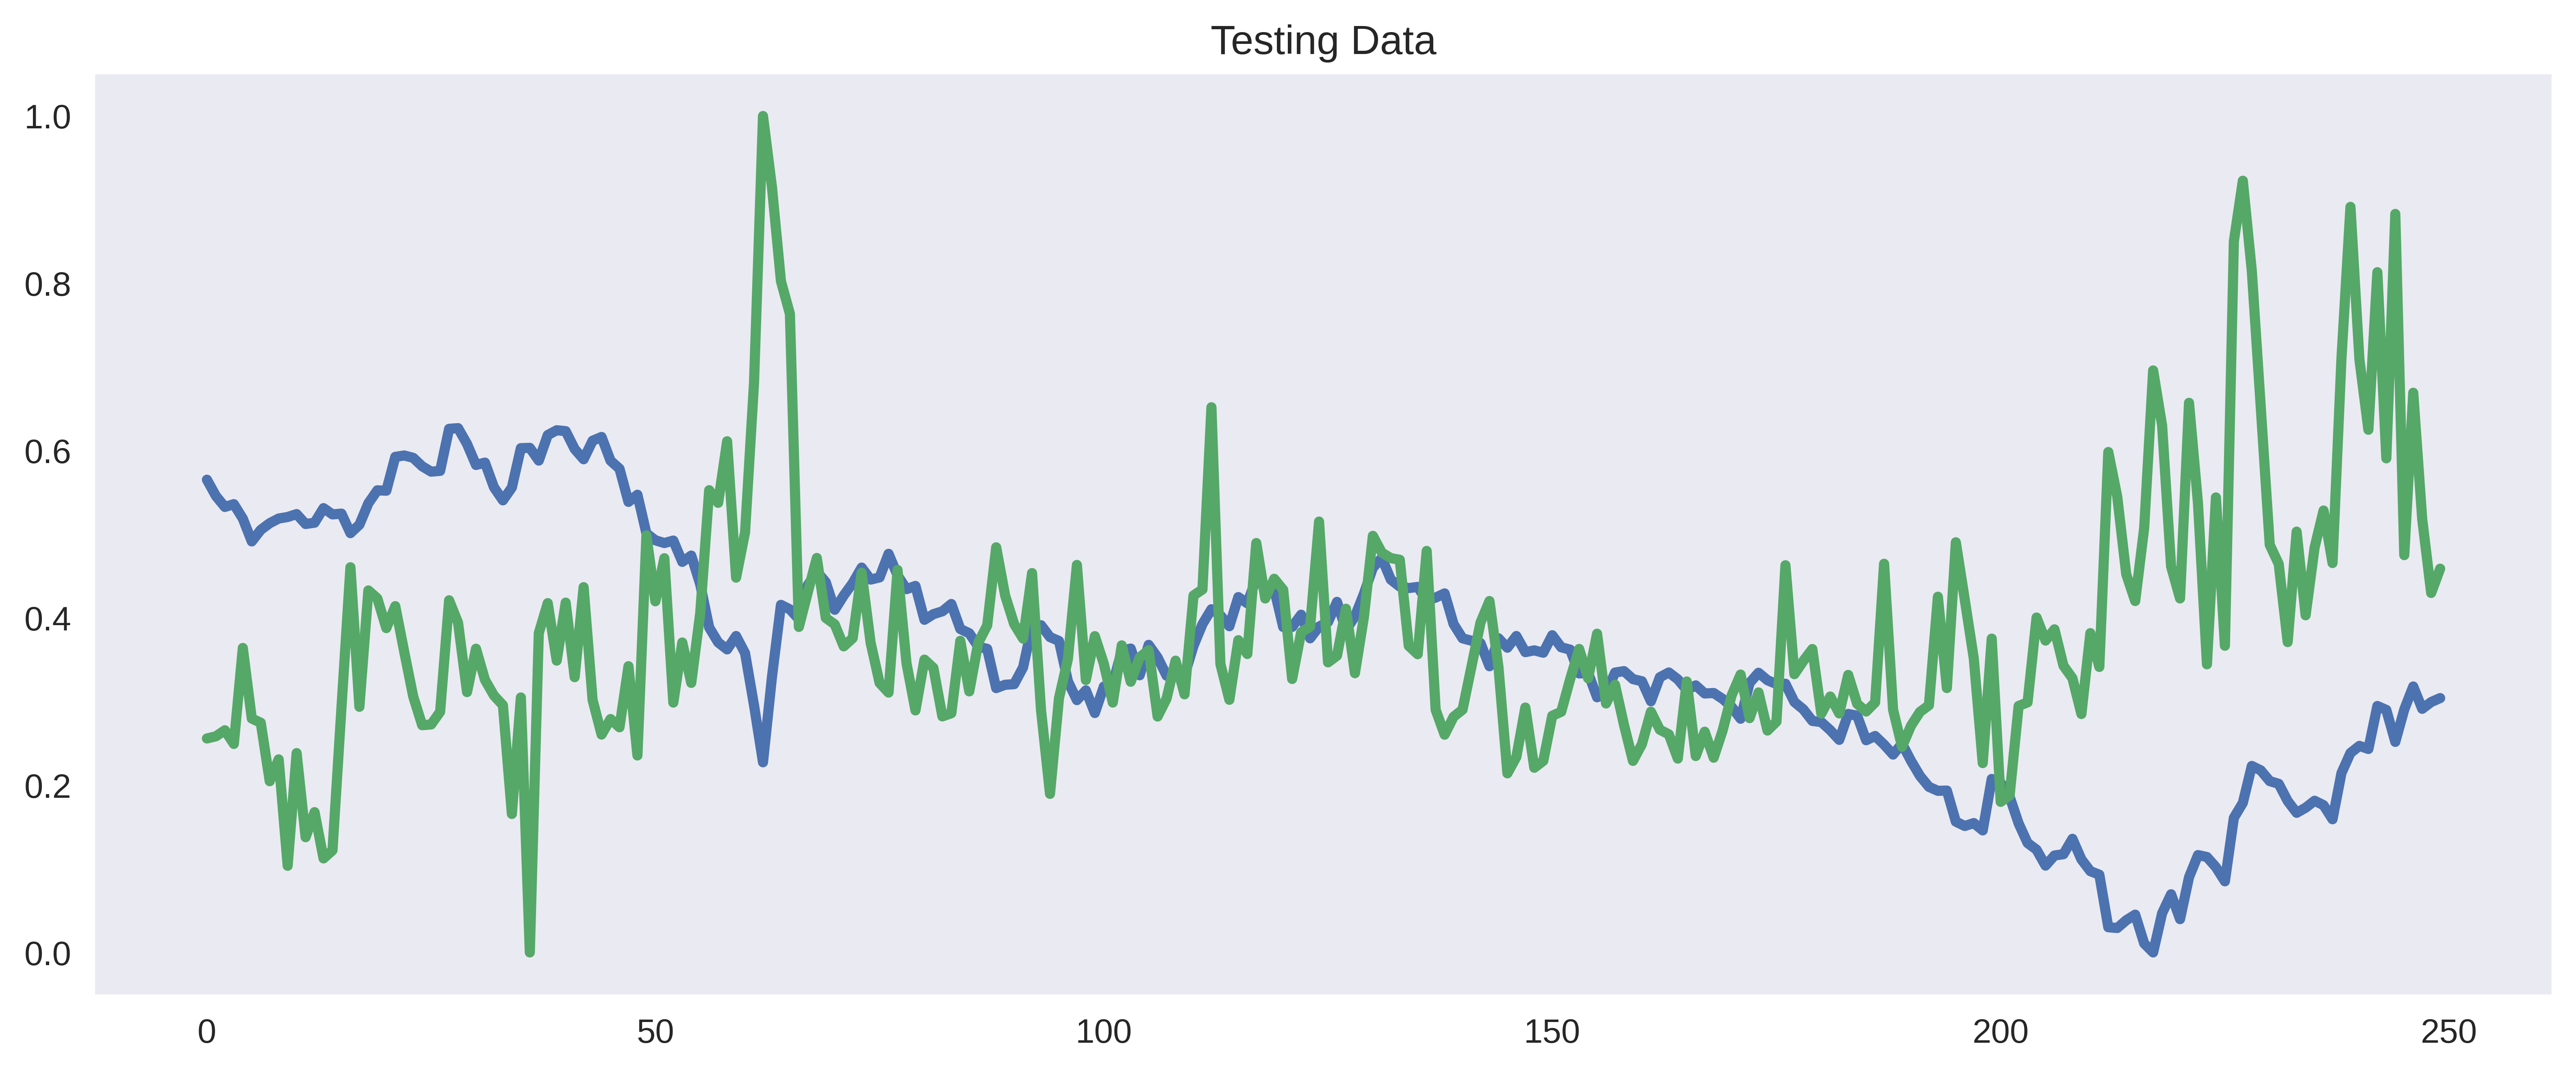

In [81]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [82]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [83]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.8224856376763168


In [84]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.75115387],
       [0.71437498],
       [0.70559266],
       [0.71056669],
       [0.72748475],
       [0.73321878],
       [0.76863943],
       [0.7601664 ],
       [0.75244331],
       [0.771451  ],
       [0.78352586],
       [0.77779382],
       [0.78139089],
       [0.78869597],
       [0.76731742],
       [0.77323751],
       [0.77136016],
       [0.75673023],
       [0.73276718],
       [0.73592718],
       [0.72629754],
       [0.73089813],
       [0.70256358],
       [0.70610694],
       [0.70543247],
       [0.70130398],
       [0.73235764],
       [0.70076704],
       [0.65336662],
       [0.66451224],
       [0.65324925],
       [0.6109185 ],
       [0.60514341],
       [0.54792245],
       [0.55619855],
       [0.50865847],
       [0.48535889],
       [0.5367797 ],
       [0.45716686],
       [0.52497264],
       [0.56969362],
       [0.55532257],
       [0.56059696],
       [0.54630302],
       [0.57008315],
       [0.54327028],
       [0.55177907],
       [0.546

In [85]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [86]:
len(Predicted)

714

In [87]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [88]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-29
1,2020-01-30
2,2020-01-31
3,2020-02-03
4,2020-02-04
...,...
709,2022-12-08
710,2022-12-09
711,2022-12-12
712,2022-12-13


In [89]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-29,0.760683
1,2020-01-30,0.717293
2,2020-01-31,0.708969
3,2020-02-03,0.711673
4,2020-02-04,0.731127
...,...,...
709,2022-12-08,0.290477
710,2022-12-09,0.317958
711,2022-12-12,0.291294
712,2022-12-13,0.299378


In [90]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-29,0.760683,0.751154
1,2020-01-30,0.717293,0.714375
2,2020-01-31,0.708969,0.705593
3,2020-02-03,0.711673,0.710567
4,2020-02-04,0.731127,0.727485
...,...,...,...
709,2022-12-08,0.290477,0.354732
710,2022-12-09,0.317958,0.383793
711,2022-12-12,0.291294,0.356692
712,2022-12-13,0.299378,0.360967


In [91]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [92]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [93]:
data

,Date,Close,Volume,Target
0,2020-01-29,27160.630859,2203836100,26449.130859
1,2020-01-30,26449.130859,2223567800,26312.630859
2,2020-01-31,26312.630859,1874255200,26356.980469
3,2020-02-03,26356.980469,2421482700,26675.980469
4,2020-02-04,26675.980469,2500238100,26786.740234
...,...,...,...,...
710,2022-12-09,19900.869141,4023277500,19463.630859
711,2022-12-12,19463.630859,3115198500,19596.199219
712,2022-12-13,19596.199219,2584117300,19673.449219
713,2022-12-14,19673.449219,2758656100,19368.589844


In [94]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-29,27160.630859,2203836100,26449.130859
1,2020-01-30,26449.130859,2223567800,26312.630859
2,2020-01-31,26312.630859,1874255200,26356.980469
3,2020-02-03,26356.980469,2421482700,26675.980469
4,2020-02-04,26675.980469,2500238100,26786.740234
...,...,...,...,...
710,2022-12-09,19900.869141,4023277500,19463.630859
711,2022-12-12,19463.630859,3115198500,19596.199219
712,2022-12-13,19596.199219,2584117300,19673.449219
713,2022-12-14,19673.449219,2758656100,19368.589844


In [95]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[2.71606309e+04, 2.20383610e+09],
       [2.64491309e+04, 2.22356780e+09],
       [2.63126309e+04, 1.87425520e+09],
       ...,
       [1.95961992e+04, 2.58411730e+09],
       [1.96734492e+04, 2.75865610e+09],
       [1.93685898e+04, 2.24339400e+09]])

In [96]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [97]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [98]:
X

[array([0.76068254]),
 array([0.71729289]),
 array([0.70896866]),
 array([0.71167325]),
 array([0.73112694]),
 array([0.73788144]),
 array([0.78099416]),
 array([0.77554044]),
 array([0.76560444]),
 array([0.78649374]),
 array([0.80111628]),
 array([0.79540457]),
 array([0.80062472]),
 array([0.80940632]),
 array([0.78322005]),
 array([0.79088025]),
 array([0.78803535]),
 array([0.76971903]),
 array([0.73996345]),
 array([0.74437557]),
 array([0.73237769]),
 array([0.73738618]),
 array([0.69782693]),
 array([0.70769099]),
 array([0.70727268]),
 array([0.70344598]),
 array([0.73673061]),
 array([0.69884781]),
 array([0.63138748]),
 array([0.6528566]),
 array([0.64304436]),
 array([0.58678484]),
 array([0.56994367]),
 array([0.51083008]),
 array([0.52303652]),
 array([0.46376619]),
 array([0.42823183]),
 array([0.49506589]),
 array([0.42743905]),
 array([0.48643186]),
 array([0.53910313]),
 array([0.52844021]),
 array([0.53648632]),
 array([0.51763211]),
 array([0.54375561]),
 array([0.5

In [99]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [100]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [101]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((499, 1, 1), (215, 1, 1))

In [102]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [103]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 7s 126ms/step - loss: 0.4495 - val_loss: 0.1986
Epoch 2/20
13/13 [==============================] - 0s 15ms/step - loss: 0.1557 - val_loss: 0.0126
Epoch 3/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0279 - val_loss: 0.0025
Epoch 4/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0120 - val_loss: 0.0039
Epoch 5/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0076 - val_loss: 0.0083
Epoch 6/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0068 - val_loss: 0.0052
Epoch 7/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 8/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 9/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 10/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0061 - val_loss: 0.0051
Epoch 11

In [104]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 4ms/step


In [105]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [106]:
test_predicted

[0.7628959,
 0.7296155,
 0.7232867,
 0.72534084,
 0.7401732,
 0.7453461,
 0.77864355,
 0.77440464,
 0.766702,
 0.7829257,
 0.79434997,
 0.7898809,
 0.7939651,
 0.80085164,
 0.78037566,
 0.786347,
 0.7841275,
 0.7698887,
 0.74694306,
 0.7503308,
 0.74113023,
 0.7449663,
 0.7148438,
 0.7223169,
 0.72199935,
 0.7190977,
 0.74446386,
 0.71561617,
 0.6651671,
 0.6810944,
 0.6738002,
 0.6324583,
 0.6202415,
 0.57793677,
 0.5865989,
 0.5448949,
 0.52032113,
 0.5668063,
 0.5197766,
 0.56073713,
 0.59805846,
 0.5904457,
 0.5961876,
 0.58275896,
 0.60138935,
 0.5788963,
 0.5873072,
 0.5854013,
 0.6077632,
 0.6299847,
 0.6174849,
 0.63207054,
 0.63807124,
 0.6252063,
 0.61907476,
 0.63560784,
 0.63338804,
 0.60971165,
 0.61409575,
 0.6177912,
 0.61137,
 0.63117504,
 0.6443345,
 0.6473548,
 0.6018403,
 0.6130099,
 0.6248589,
 0.6179369,
 0.6289605,
 0.6454995,
 0.62964755,
 0.6267526,
 0.6113003,
 0.6098838,
 0.6159175,
 0.63596916,
 0.6364945,
 0.63117015,
 0.5721836,
 0.5731353,
 0.59185076,
 0.

In [107]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-30
2,2020-01-31
3,2020-02-03
4,2020-02-04
5,2020-02-05
...,...
710,2022-12-09
711,2022-12-12
712,2022-12-13
713,2022-12-14


In [108]:
df_predicted['predictions'] = test_predicted

In [109]:
df_predicted

,Date,predictions
1,2020-01-30,0.762896
2,2020-01-31,0.729616
3,2020-02-03,0.723287
4,2020-02-04,0.725341
5,2020-02-05,0.740173
...,...,...
710,2022-12-09,0.428067
711,2022-12-12,0.446092
712,2022-12-13,0.428600
713,2022-12-14,0.433885


In [110]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [111]:
df_predicted['Close'] = close[1:]

In [112]:
df_predicted

,Date,predictions,Close
1,2020-01-30,0.762896,0.717293
2,2020-01-31,0.729616,0.708969
3,2020-02-03,0.723287,0.711673
4,2020-02-04,0.725341,0.731127
5,2020-02-05,0.740173,0.737881
...,...,...,...
710,2022-12-09,0.428067,0.317958
711,2022-12-12,0.446092,0.291294
712,2022-12-13,0.428600,0.299378
713,2022-12-14,0.433885,0.304089


In [113]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")